# Introduction

## Explorations of potential outcomes model

We will use our first dataset.

This the original data from:

* 

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_pickle('../../datasets/processed/angrist_pischke/nswre74.pkl')
df.head()

treat  age  ed  black  hisp  married  nodeg  re74  re75          re78  \
0      1   37  11      1     0        1      1   0.0   0.0   9930.045898   
1      1   22   9      0     1        0      1   0.0   0.0   3595.894043   
2      1   30  12      1     0        0      0   0.0   0.0  24909.449219   
3      1   27  11      1     0        0      1   0.0   0.0   7506.145996   
4      1   33   8      1     0        0      1   0.0   0.0    289.789886   

     age2  
0  1369.0  
1   484.0  
2   900.0  
3   729.0  
4  1089.0

What is the data that corresponds to $(Y, Y_1, Y_0, D)$?

In [38]:
# We first create True / False
is_treated = df['treat'] == 1

df['Y'] = df['re78']
df['Y_0'] = df.loc[~is_treated, 're78']
df['Y_1'] = df.loc[is_treated, 're78']

df['D'] = np.nan
df.loc[~is_treated, 'D'] = 0
df.loc[is_treated, 'D'] = 1

Let us get a basic impression on how the distribution of earnings looks like by treatment status.

In [33]:
df.groupby('D')['re78'].describe()

count         mean          std  min         25%          50%  \
D                                                                    
0.0  260.0  4554.800781  5483.835938  0.0    0.000000  3138.795532   
1.0  185.0  6349.144043  7867.402344  0.0  485.229797  4232.309082   

             75%           max  
D                               
0.0  7288.420044  39483.531250  
1.0  9642.999023  60307.929688

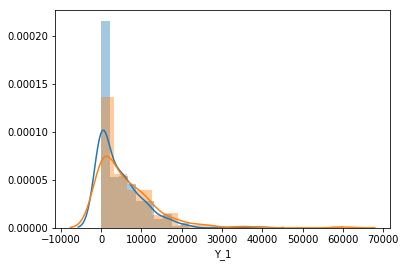

In [21]:
sns.distplot(df['Y_0'].dropna(), label='treated')
sns.distplot(df['Y_1'].dropna())